# Breast Cancer Classification — Notebook
Kort EDA + baseline-modeller på Breast Cancer Wisconsin (Diagnostic).


In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay


In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0=malignant, 1=benign
X.head(), y.value_counts()


(   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst radius  worst texture  worst perimeter 

## EDA
Sjekk info, statistikk og raske plott.


,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
mean texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
mean area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
mean compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
mean concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
mean concave points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
mean symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


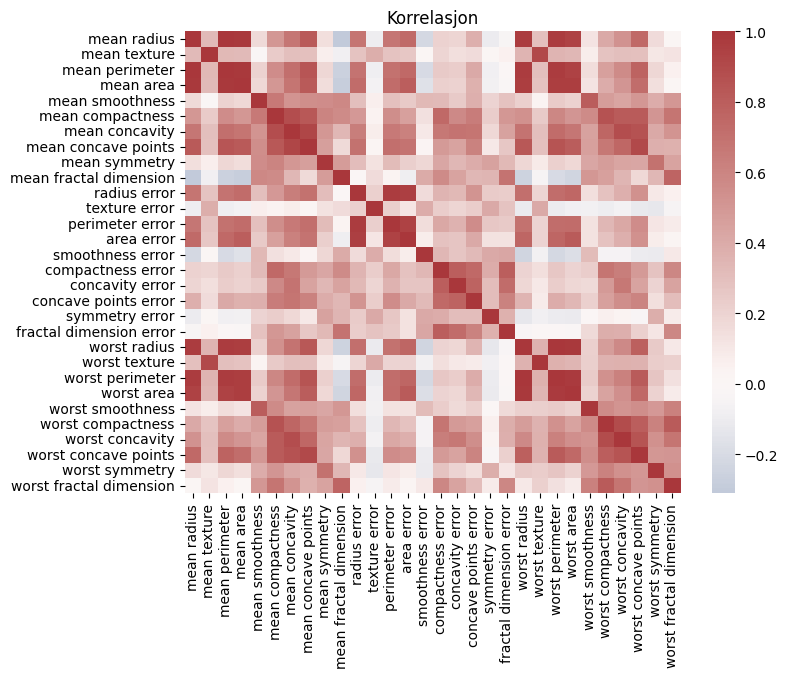

In [3]:
display(X.describe().T.iloc[:10])
plt.figure(figsize=(8,6))
sns.heatmap(X.corr(), cmap="vlag", center=0)
plt.title("Korrelasjon")
plt.show()


## Forbehandling og split


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


## Baseline-modeller: LR, SVM, RF



=== LogReg ===
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

ROC-AUC: 0.9953703703703703


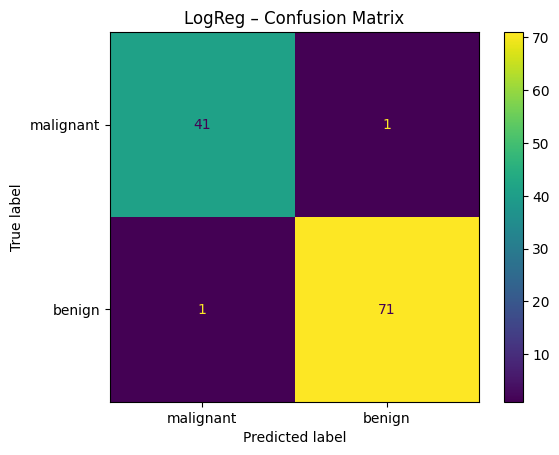

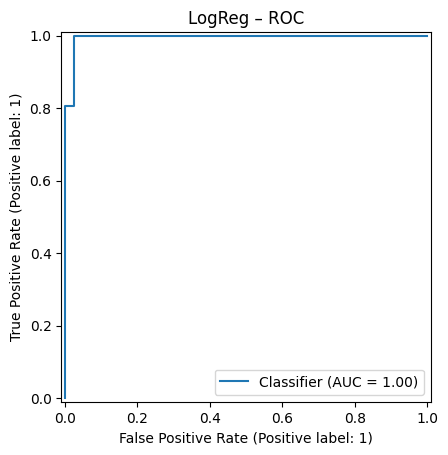


=== SVM ===
              precision    recall  f1-score   support

           0     0.9762    0.9762    0.9762        42
           1     0.9861    0.9861    0.9861        72

    accuracy                         0.9825       114
   macro avg     0.9812    0.9812    0.9812       114
weighted avg     0.9825    0.9825    0.9825       114

ROC-AUC: 0.9950396825396826


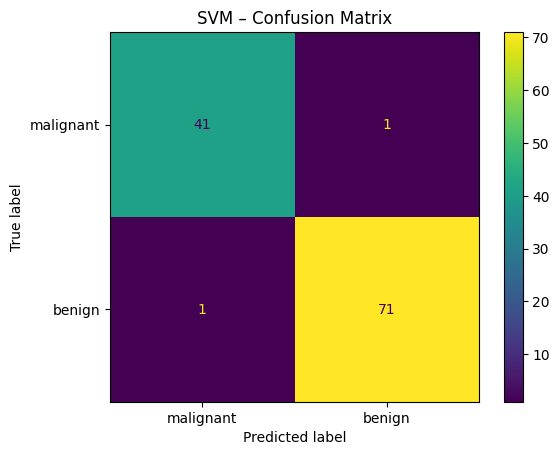

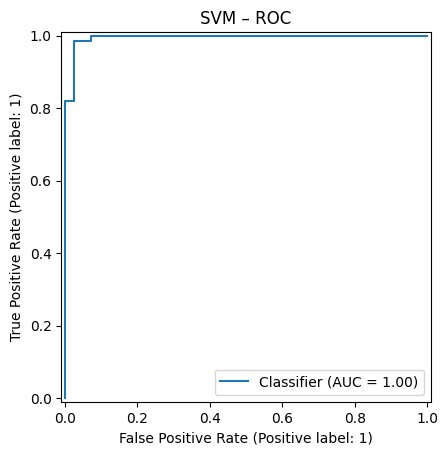


=== RF ===
              precision    recall  f1-score   support

           0     0.9286    0.9286    0.9286        42
           1     0.9583    0.9583    0.9583        72

    accuracy                         0.9474       114
   macro avg     0.9435    0.9435    0.9435       114
weighted avg     0.9474    0.9474    0.9474       114

ROC-AUC: 0.9937169312169313


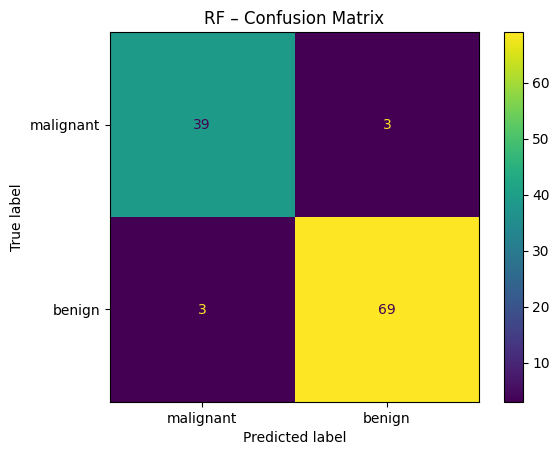

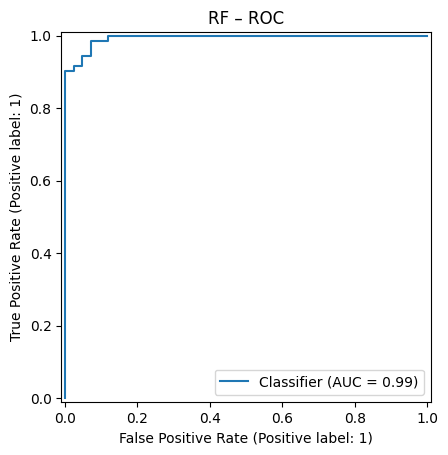

In [5]:
models = {
    "LogReg": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "RF": RandomForestClassifier(n_estimators=300, random_state=42)
}

for name, clf in models.items():
    clf.fit(X_train_s, y_train)
    preds = clf.predict(X_test_s)
    proba = clf.predict_proba(X_test_s)[:,1]
    print(f"\n=== {name} ===")
    print(classification_report(y_test, preds, digits=4))
    print("ROC-AUC:", roc_auc_score(y_test, proba))

    ConfusionMatrixDisplay(confusion_matrix(y_test, preds), display_labels=data.target_names).plot()
    plt.title(f"{name} – Confusion Matrix")
    plt.show()

    RocCurveDisplay.from_predictions(y_test, proba)
    plt.title(f"{name} – ROC")
    plt.show()


## Feature importance (RF) / koeffisienter (LR)


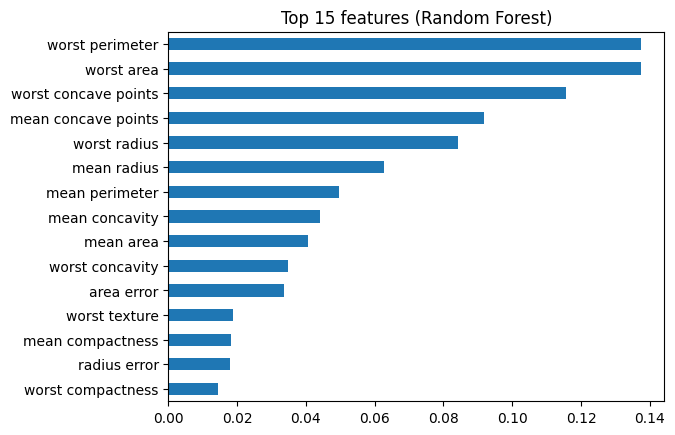

In [6]:
rf = models["RF"]
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False).head(15)
imp.plot(kind="barh")
plt.title("Top 15 features (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


## Oppsummering
– Hvilken modell fungerte best?  
